In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Project imports
import explore
import wrangle

from math import sqrt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('texasma.csv')
df.head(2)

,Crash ID,Average Daily Traffic Amount,Average Daily Traffic Year,City,County,Crash Date,Crash Death Count,Crash Month,Crash Severity,Crash Time,...,Person Blood Alcohol Content Test Result,Person Death Count,Person Drug Test Result,Person Ethnicity,Person Gender,Person Helmet,Person Injury Severity,Person Not Injured Count,Person Total Injury Count,Person Type
0,11825679,21549,2018,SAN ANTONIO,BEXAR,1/1/11,0,1,B - SUSPECTED MINOR INJURY,2230,...,No Data,0,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,0,1,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE
1,11825679,21549,2018,SAN ANTONIO,BEXAR,1/1/11,0,1,B - SUSPECTED MINOR INJURY,2230,...,No Data,0,No Data,H - HISPANIC,2 - FEMALE,1 - NOT WORN,C - POSSIBLE INJURY,0,1,6 - PASSENGER/OCCUPANT ON MOTORCYCLE TYPE VEHICLE


In [3]:
df = wrangle.cleaned(df)
df.head()

,city,county,deceased,injured,day,latitude,longitude,age,driver,helmet,male
crash_date,,,,,,,,,,,
2011-01-01 22:30:00,SAN ANTONIO,BEXAR,0,1,SATURDAY,29.358915,-98.566314,27,1,0,1
2011-01-01 22:30:00,SAN ANTONIO,BEXAR,0,1,SATURDAY,29.358915,-98.566314,28,0,0,0
2011-01-03 12:15:00,SAN ANTONIO,BEXAR,1,0,MONDAY,29.537465,-98.424572,53,1,0,1
2011-01-05 21:15:00,SAN ANTONIO,BEXAR,0,1,WEDNESDAY,29.513015,-98.535152,47,1,0,1
2011-01-06 12:10:00,AUSTIN,WILLIAMSON,0,1,THURSDAY,30.476422,-97.764810,19,1,1,1


In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1634145058280' style='position: relative'><noscript><a href='#'><img alt='TXMC ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TexasMotorcycleDeaths2011-2021&#47;TXMC&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;TexasMotorcycleDeaths2011-2021&#47;TXMC?:language=en-US&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TexasMotorcycleDeaths2011-2021&#47;TXMC&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634145058280');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1050px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='1050px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
df = df[df.latitude != 0]

In [ ]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

In [ ]:
df.to_csv('/Users/hector/codeup-data-science/texas_motorcycle_accidents/txmc.csv')

In [ ]:
df.deceased.value_counts()

In [ ]:
#### reduce this to county's where deceased is greater then 0.
fig, ax = plt.subplots(figsize=(100, 25))
plt.xticks(rotation=90)
sns.barplot(x='county', y='deceased', data=train)

##### Split

In [ ]:
#initial hypothesis test and model was done on this split.
train, validate, test = prepare.train_validate_test_split(df, 'deceased', seed=123)

In [ ]:
### Classification
# Whether or not a person survives (helmet, driver)

### Clustering
# Which age group die in an accident (age)
# where are most accidents occuring (lat/long)

### Timeseries
# predict the number of motorcycle accidents over the next two years (timeseries)
# How likely are you to be killed in a motorcycle accident (injured)

### Univariate

In [ ]:
cat_vars = ['injured', 'driver', 'helmet', 'male']
quant_vars = ['age']

In [ ]:
explore.explore_univariate(train, cat_vars, quant_vars)

##### Key Takeaways
1. 82.5% riders involved in a motorcycle accident are injured.
2. 92.7% riders involved in a motorcycle accident are the drivers.
3. About half of riders involved in a motorcylce accident where a helmet.
4. 88.4% are male riders.
5. Average age of riders involved in an accident are 38 years old.

### Bivariate

In [ ]:
explore.explore_bivariate(train, 'deceased', cat_vars, quant_vars)

##### Key Takeaways
1. Of those riders injured in the accident 55 died.
2. Drivers account for 174 deaths and passangers account for 20.
3. 124 riders who died 124 were NOT wearing a helmet.
4. Riders who died are almost equal in gender.
5. Majority of riders who died are in the age range of 40 - 50 years old.

# Hypothesis Test

In [ ]:
alpha = 0.5

1. How likely is a rider to survive a motorcycle accident not wearing a helmet? (chi2)
    - Null: Its not likely a rider will survive a motorcycle accident if not wearing a helmet.
    - Alternate: It is likely the rider will survive a motorcycle accident if not wearing a helmet.

In [ ]:
Null = 'Its not likely a rider will survive a motorcycle accident if not wearing a helmet.'
Alternate = 'It is likely the rider will survive a motorcycle accident if not wearing a helmet.'

observed = pd.crosstab(train.deceased, train.helmet)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

2. Are people over 40 more likely to die in a motorcycle accident? (ttest 1samp)
    - Null: People over 40 are NOT more likely to die in a motorcycle accident.
    - Alternate: People over 40 are more likely to die in a motorcycle accident.

In [ ]:
Null = 'People over 40 are NOT more likely to die in a motorcycle accident.'
Alternate = 'People over 40 are more likely to die in a motorcycle accident.'

older = train[train.age > 40].deceased
younger = train.deceased.mean()
test_results = stats.ttest_1samp(older, younger)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

2. Rider with a passenger who is more likely to die in a motorcycle accident; passenger or driver?(ttest 2samp)
    - Null: Passengers are more likely to die in a motorcycle accident.
    - Alternate: Driver are more likely to die in a motorcycle accident.

In [ ]:
Null = 'Passengers are more likely to die in a motorcycle accident.'
Alternate = 'Drivers are more likely to die in a motorcycle accident.'

driver = train[train['driver'] == 1]
passenger = train[train['driver'] == 0]
test_results = stats.ttest_ind(driver.deceased, passenger.deceased)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

##### Key Takeaway
1. Riders not wearing a helmet are likely to survive a motorcycle accident.
    - This tells me motorcycle accidents may not be severe enough to cause a fatal casualty. Good news, I guess, for riders - atleast for those in Texas!
3. Riders older than 40 are more likely to die in a motorcycle accident. 
    - Intersting my initial thoughts would be younger riders would be invovlved in more fatal causualties with their inexperience.
    - However; for older riders, this could mean several things: too comfortable, over confident, less reactive, and no recent safety training/riderskills.
4. Drivers are more then likely to die in when riding with a passenger.


### Multivariate

In [ ]:
explore.explore_multivariate(train, 'deceased', cat_vars, quant_vars)

##### Key Takeaway
1. Violin plot confirms age is a factor in those riders who get in more accidents that conclude in injuy or death.
2. Although you are likely to survive when not wearing a helmet the violin plot show riders 40 yrs. and older who do not wear a helment result in a fatal casualty.
3. Seems more older females die in accidents over 40. Where males make up a larger portion of all rider ages.
4. Boxplot shows a slightly higher mortality average in motorcycle accidents.

## Train, Validate, Test

In [ ]:
X_train = train[['driver', 'helmet', 'age']]
y_train = train.deceased
X_validate = validate[['driver', 'helmet', 'age']]
y_validate = validate.deceased
X_test = test[['driver', 'helmet', 'age']]
y_test = test.deceased

In [ ]:
#print of x, y variables shape.
print(X_train.shape,y_train.shape)
print(X_validate.shape,y_validate.shape)
print(X_test.shape,y_test.shape)

# Model

## Baseline

In [ ]:
baseline = y_train.mode()
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#prediction, accuracy and class report evaluation function used for the above functions
def get_metrics_bin(clf, X, y):
    '''
    get_metrics_bin will take in a sklearn classifier model, an X and a y variable and utilize
    the model to make a prediction and then gather accuracy, class report evaluations
    Credit to @madeleine-capper
    return:  a classification report as a pandas DataFrame
    '''
    y_pred = clf.predict(X)
    accuracy = clf.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report 

In [ ]:
### Decision Tree
#Create the model
dt = DecisionTreeClassifier(max_depth=3, random_state=123)
#Fit the model
dt.fit(X_train, y_train)
#Use the model
dt.predict(X_train)
#prediction, accuracy, & class report evaluations
get_metrics_bin(dt, X_train, y_train)

In [ ]:
get_metrics_bin(dt, X_validate, y_validate)

In [ ]:
get_metrics_bin(dt, X_test, y_test)

##### Key Takeaways
1. Decission Tree performed the best out of the models tested.
2. Both validate and test data sets performed slightly better then the baseline

In [ ]:
df.info()

In [4]:
ts = df.drop(columns=['city', 'county', 'injured', 'day', 'latitude', 'longitude', 'age', 'driver', 'helmet', 'male'])
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8293 entries, 2011-01-01 22:30:00 to 2021-10-06 00:40:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   deceased  8293 non-null   int64
dtypes: int64(1)
memory usage: 129.6 KB


In [5]:
#set split variables
train_size = int(len(ts) * .5)
validate_size = int(len(ts) * .3)
test_size = int(len(ts) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = ts[: train_size]
validate = ts[train_size : validate_end_index]
test = ts[validate_end_index : ]

In [ ]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel('Deceased')
    plt.xlabel('Year')
    plt.title('')
    plt.show()
    print('train dataset average temperature:', train.deceased.mean())


In [ ]:
y = train.deceased
y.plot.hist()

In [ ]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=90)
ax.set(title='Average Deceased by Year', xlabel='Year (train)', ylabel='Deceased')

In [ ]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month (train)', ylabel='Deceased')

In [ ]:
y.resample('M').mean().plot( label='Montly')
y.resample('Y').mean().plot(xlabel = 'Year (train)', ylabel = "Yearly Death", label='Yearly')
plt.legend()

In [ ]:
y.resample('Y').mean().diff().plot(label='Average year-to-year deaths')
y.resample('M').mean().diff().plot(xlabel = 'Year (train)', ylabel = 'Deceased Change', label='Average month-to-month change in deaths')
plt.legend()

In [ ]:
y = train.deceased.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

In [ ]:
decomposition.iloc[:, 1:].plot(xlabel='Year', ylabel = 'Deceased')

In [ ]:

result.plot()

In [ ]:
train = train.resample('M').mean()
# create a categorical feature
train['avg_bin'] = pd.qcut(train.deceased, 4, labels=['1', '2', '3', '4'])
train.groupby('avg_bin').mean()

In [ ]:
#Remove the avgtemp_bin not to distort modeling
del train['avg_bin']

In [10]:
train.shape, validate.shape, test.shape

((4146, 1), (2487, 1), (1660, 1))

In [6]:
#evaluation function to compute rmse.
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [7]:
#plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [8]:
#create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

#function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [9]:
eval_df

,model_type,target_var,rmse


In [11]:
#Last Observed

avg = train['deceased'][-1:][0]

yhat_df = pd.DataFrame({'deceased': [avg]}, index = validate.index)

yhat_df.head(2)

,deceased
crash_date,
2015-09-14 07:48:00,0
2015-09-14 12:35:00,0


In [58]:
yhat_df.shape[0]

644

In [60]:
train.shape

(3804, 1)

deceased -- RMSE: 0


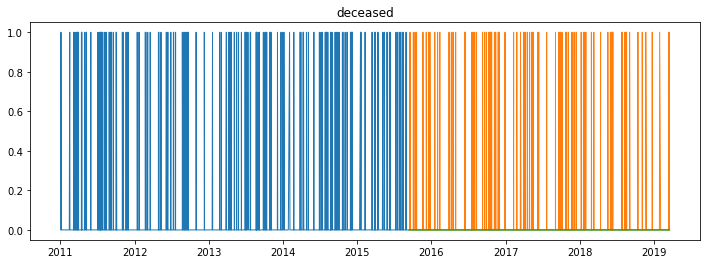

In [12]:
#Plot Actual vs. Predicted Values
for col in train.columns:
    plot_and_eval(col)

In [13]:
#Evaluate
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Last Observed Value', target_var = col)

In [14]:
eval_df

,model_type,target_var,rmse
0,Last Observed Value,deceased,0.0


In [15]:
#Simple Average
#Make predictions
avg = round(train['deceased'].mean(),2)

def make_predictions():
    yhat_df = pd.DataFrame({'deceased': [avg]}, index = validate.index)
    return yhat_df

yhat_df = make_predictions()


In [ ]:
yhat_df.head(2)

deceased -- RMSE: 0


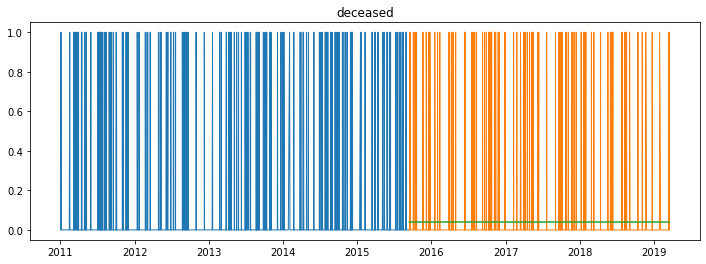

In [16]:

#Plot Actual vs. Predicted Values
for col in train.columns:
    plot_and_eval(col)

In [17]:
#Evaluate
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Simple Average', target_var = col)

In [18]:
eval_df

,model_type,target_var,rmse
0,Last Observed Value,deceased,0.0
1,Simple Average,deceased,0.0


In [ ]:
#Moving Average

In [ ]:
#Make Predictions
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 3

avg = round(train['deceased'].rolling(period).mean().iloc[-1], 2)

yhat_df = make_predictions()
yhat_df.head(3)


In [ ]:
#Plot Actual vs. Predicted Values
for col in train.columns:
    plot_and_eval(col)

In [ ]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'Moving Average', target_var = col)

In [ ]:
eval_df

#### Previous Cycle

In [46]:
#Re-split data
train = ts['2014':'2018']
validate = ts['2019']
test = ts['2020']

In [72]:
train.shape, validate.shape, test.shape

((3804, 1), (646, 1), (623, 1))

In [76]:
train['2018'].shape

(644, 1)

In [70]:
#Make Predictions
yhat_df = ts['2018'] + train.diff(365).mean()

In [71]:
yhat_df.shape

(644, 1)

In [63]:
pd.concat([yhat_df.head(1), validate.head(1)])

,deceased
crash_date,
2018-01-03 18:04:00,0.001454
2019-01-05 15:10:00,0.000000


ValueError: Found input variables with inconsistent numbers of samples: [646, 644]

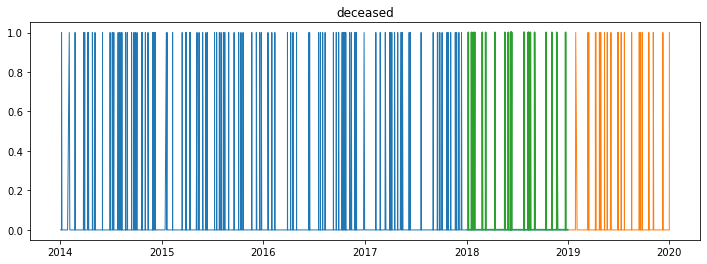

In [64]:
#Plot and Evaluate
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = 'Previous Cycle', target_var = col)

In [65]:
#get the min rmse for the target variable
min_rmse_items_sold = eval_df.groupby('target_var')['rmse'].min()[0]

#filter only the rows that match those rmse to find out 
eval_df[(eval_df.rmse == min_rmse_items_sold)]

,model_type,target_var,rmse
0,Last Observed Value,deceased,0.0
1,Simple Average,deceased,0.0


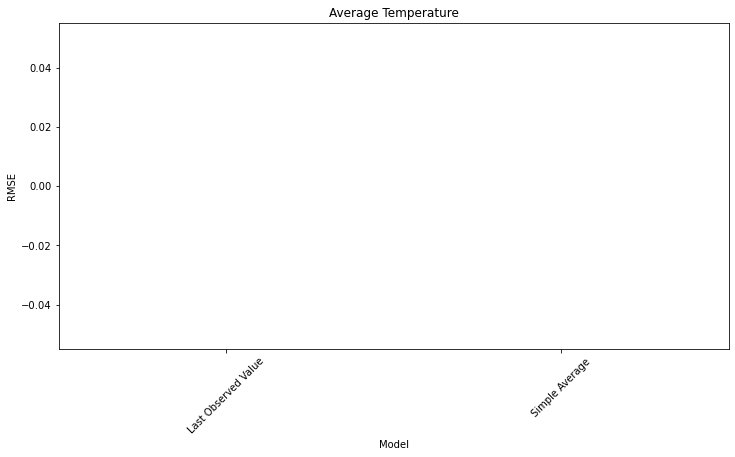

In [66]:
for col in train.columns:
    x = eval_df[eval_df.target_var == col]['model_type']
    y = eval_df[eval_df.target_var == col]['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title('Average Temperature')
    plt.ylabel('RMSE')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
#Out of sample We will be using train + validate to predict test
yhat_df = validate + train.diff(36).mean()
yhat_df.index = test.index

ValueError: Length mismatch: Expected axis has 2487 elements, new values have 1660 elements

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.api import Holt



#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#visual format
pd.options.display.float_format = '{:20,.2f}'.format

#plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [ ]:
#plots train variable distributions
def variable_distributions(train):
 
    for col in train.columns:
        plt.figure(figsize=(4,2))
        plt.ticklabel_format(axis = 'both', style = 'sci', useMathText = True)
        plt.hist(train[col], edgecolor='black')
        plt.title(col)
        plt.show()

In [ ]:
df = df.drop(columns=['Crash ID', 'Average Daily Traffic Amount', 'Average Daily Traffic Year', 'Highway Number',
                     'Surface Condition', 'Surface Type', 'Vehicle Hit and Run Flag',
                     'Person Blood Alcohol Content Test Result', 'Person Drug Test Result',
                     'Crash Month', 'Crash Year', 'Number of Lanes', 'License Plate State',
                     'Driver License Type', 'Crash Severity', 'Unit Death Count', 'Unit Not Injured Count',
                     'Person Death Count', 'Person Injury Severity', 'Person Not Injured Count', 'Person Total Injury Count'])

In [ ]:
df = df.rename(str.lower, axis='columns')

In [ ]:
df = df.rename(columns = {'crash date':'date', 'day of week':'day',
                         'weather condition':'weather', 'vehicle color':'color', 'vehicle make':'make',
                         'person age':'age', 'person ethnicity':'ethnicity', 'crash death count':'deceased', 'crash time':'time',
                         'crash total injury count':'injured', 'driver license state':'dl_state', 'person gender':'gender',
                         'person helmet':'helmet', 'person type':'driver'})

In [ ]:
df = df.replace(to_replace = {'5 - DRIVER OF MOTORCYCLE TYPE VEHICLE', '6 - PASSENGER/OCCUPANT ON MOTORCYCLE TYPE VEHICLE'},
                value = {'driver', 'passenger'})

In [ ]:
df = df.replace(to_replace = {'1 - NOT WORN', '99 - UNKNOWN IF WORN'}, value = 'not worn')

In [ ]:
df = df.replace(to_replace = {'2 - WORN, DAMAGED', '3 - WORN, NOT DAMAGED', '4 - WORN, UNK DAMAGE'}, value = 'worn')

In [ ]:
df = df.replace(to_replace = {'2 - FEMALE'}, value = 'female')

In [ ]:
df = df.replace(to_replace = {'1 - MALE'}, value = 'male')

In [ ]:
df['gender'] = df['gender'].replace({'99 - UNKNOWN':'male', 'No Data':'male'})

In [ ]:
df['ethnicity'] = df['ethnicity'].replace({'No Data':'98 - OTHER'})

In [ ]:
df['age'] = df['age'].replace({'No Data':37})

In [ ]:
df['make'] = df['make'].replace({'No Data':'unknown', 'UNKNOWN':'unknown'})

In [ ]:
df['color'] = df['color'].replace({'No Data':'99 - UNKNOWN'})

In [ ]:
df['dl_state'] = df['dl_state'].replace({'No Data':'UN - UNKNOWN'})

In [ ]:
df['injured'] = df['injured'].replace({2:1, 3:1, 4:1, 5:1, 6:1, 7:1})

In [ ]:
df['deceased'] = df['deceased'].replace({2:0})

In [ ]:
df['latitude'] = df['latitude'].replace({'No Data':0})

In [ ]:
df['longitude'] = df['longitude'].replace({'No Data':0})

In [ ]:
df['weather'] = df['weather'].str[4:]

In [ ]:
df['weather'] = df['weather'].str.strip()

In [ ]:
df['dl_state'] = df['dl_state'].str[5:]

In [ ]:
df['color'] = df['color'].str[6:]

In [ ]:
df['ethnicity'] = df['ethnicity'].str[4:]

In [ ]:
df['ethnicity'] = df['ethnicity'].str.strip()

In [ ]:
df.time = df.time.astype(str)
df['time'] = df['time'].apply(lambda x: x.zfill(4))
df.time = df.time.str[:2] + ':' + df.time.str[-2:]

In [ ]:
df['crash_date'] = df['date'] +' '+ df['time']

In [ ]:
df['crash_date'] = pd.to_datetime(df['crash_date'])

In [ ]:
df = df.set_index('crash_date').sort_index()

In [ ]:
convert_dict_int = {'age': int, 'deceased':int, 'injured':int, 'latitude':float, 'longitude':float}
df = df.astype(convert_dict_int)

In [ ]:
#get_dummies creates a seperate df of booleans for the identified columns below. Cleaning for the decission tree.
dummy_df = pd.get_dummies(df[['driver', 'helmet', 'gender']], dummy_na=False, drop_first=[True, True])

In [ ]:
df = df.drop(columns=['driver', 'helmet', 'gender', 'date', 'time'])

In [ ]:
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
df = df.rename(columns = {'driver_passenger':'driver', 'helmet_worn':'helmet', 'gender_male':'male'})

In [ ]:
convert_dict_int = {'driver': int, 'helmet':int, 'male':int}
df = df.astype(convert_dict_int)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

In [ ]:
df1 = df[['city', 'county', 'latitude', 'longitude']]
df1.head()

In [ ]:
temp_df = df.loc[(df['latitude'] == 'No Data')]
temp_df